In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os
import warnings

In [7]:
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# Resolve LOKY_MAX_CPU_COUNT warning
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [9]:
# Load the dataset
data = pd.read_csv('Customer-Data.csv')

In [10]:
# Data Exploration
print("Dataset Overview:")
print(data.info())
print(data.describe())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   i

<Figure size 1400x1000 with 0 Axes>

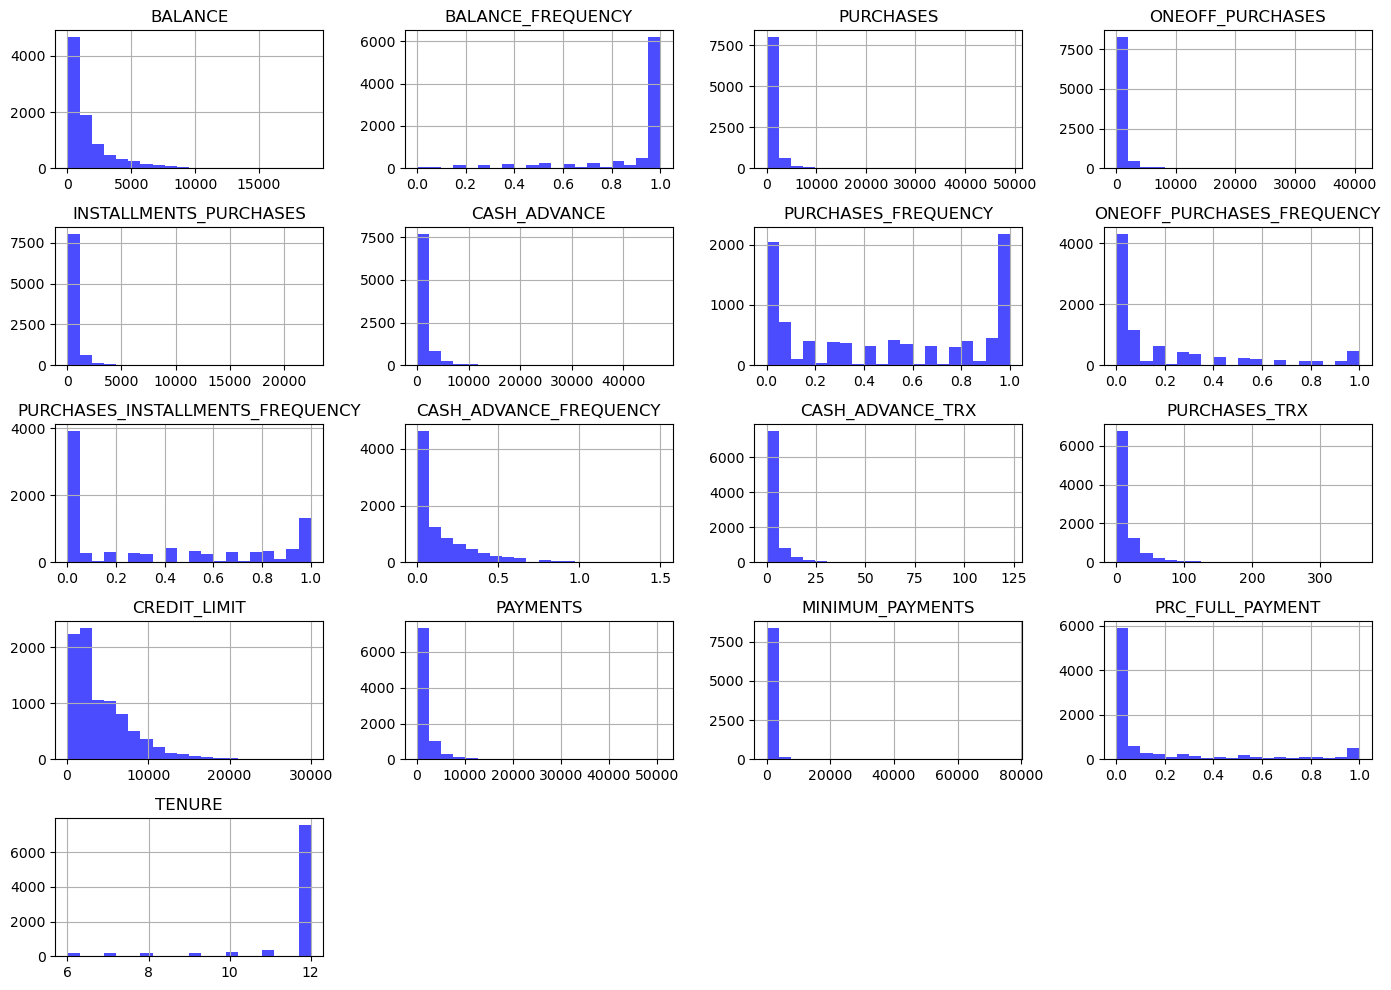

In [11]:
# EDA: Visualizing feature distributions
plt.figure(figsize=(14, 10))
data.hist(bins=20, figsize=(14, 10), color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

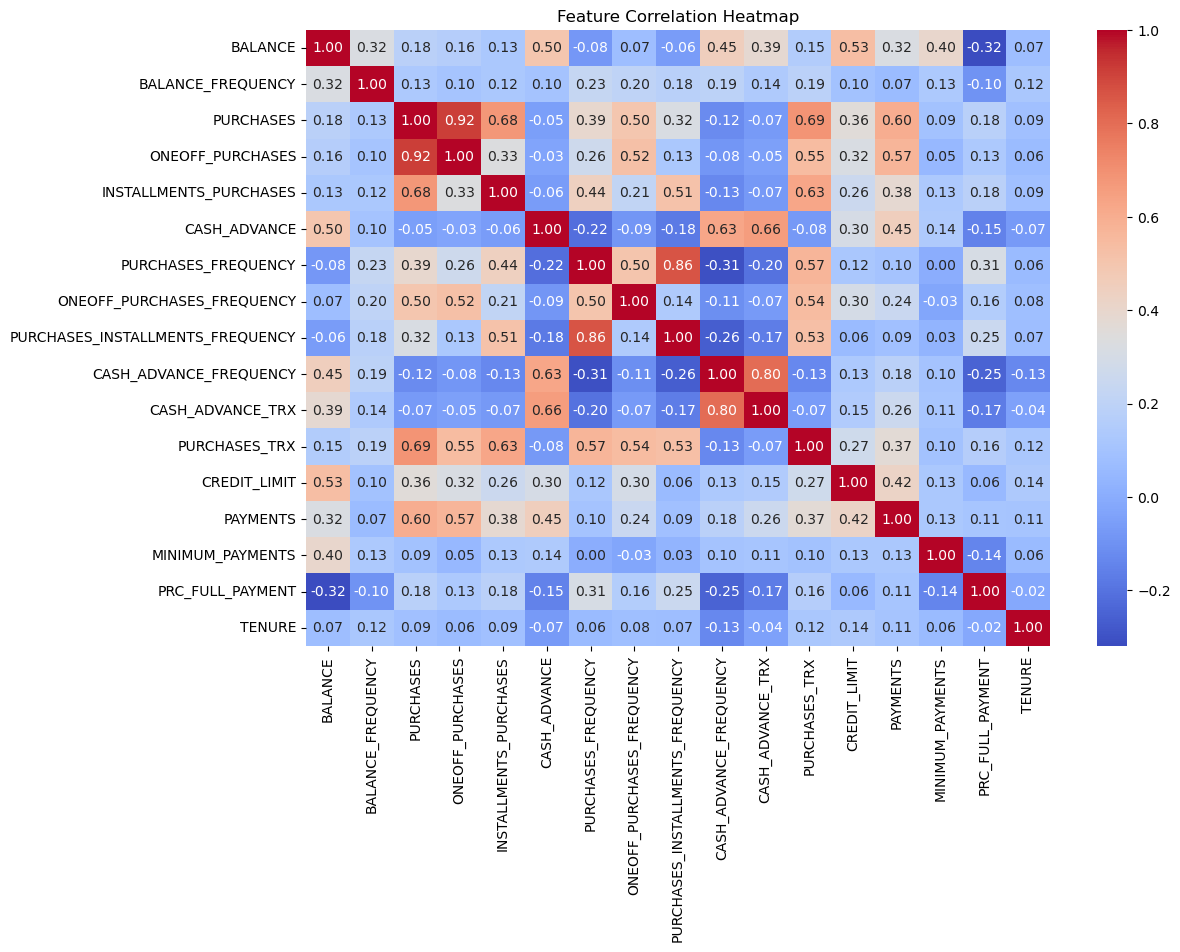

In [12]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

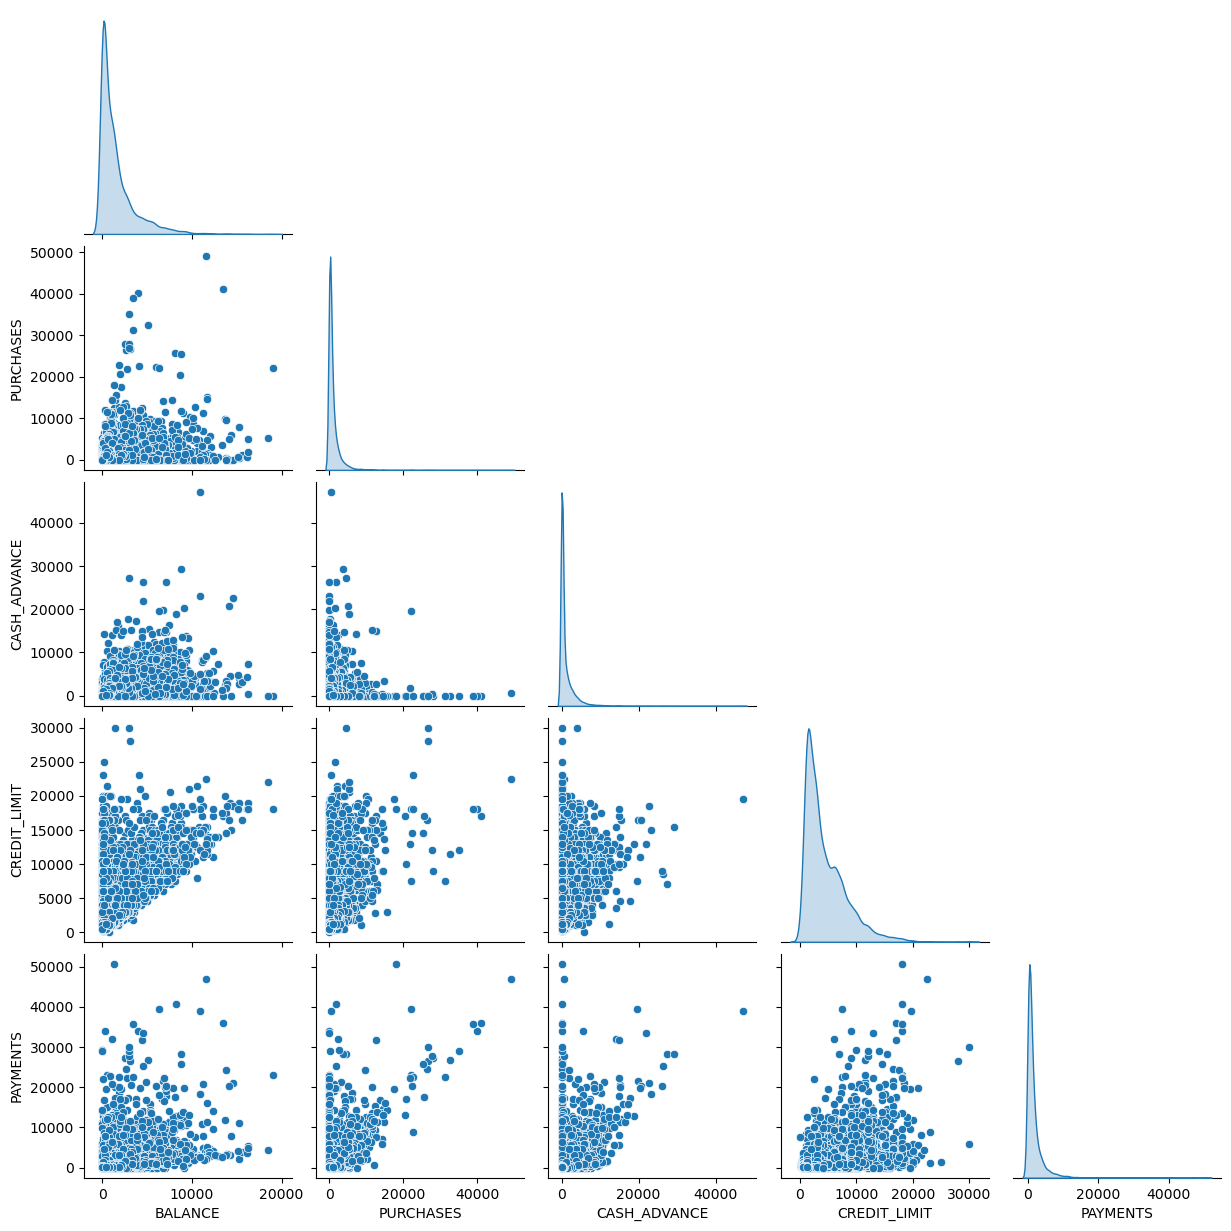

In [13]:
# Pairplot for selected features
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
sns.pairplot(data[selected_features], diag_kind='kde', corner=True)
plt.show()

In [59]:
# Data Preprocessing
# Handle missing values
data.loc[:, 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())
data.loc[:, 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [60]:
# Drop non-numeric columns
processed_data = data.drop(columns=['CUST_ID'])

In [61]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

In [62]:
# Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [63]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

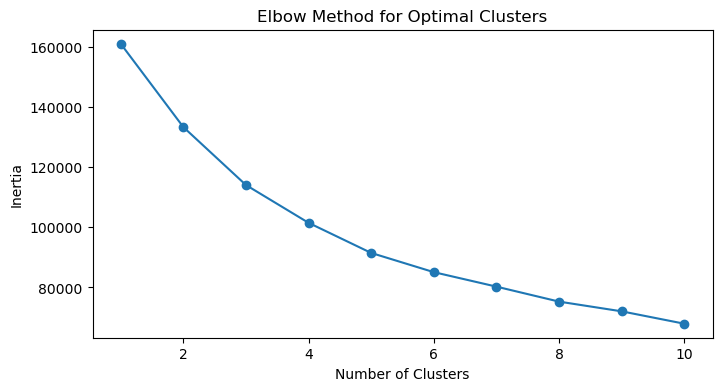

In [64]:
# Clustering
# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
# Apply K-Means and Agglomerative Clustering
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [66]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_data)

In [67]:
# Performance Evaluation
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.22181960039036588


In [68]:
# Visualization
# Plot PCA and t-SNE results with K-Means clusters
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'PCA Component 2')

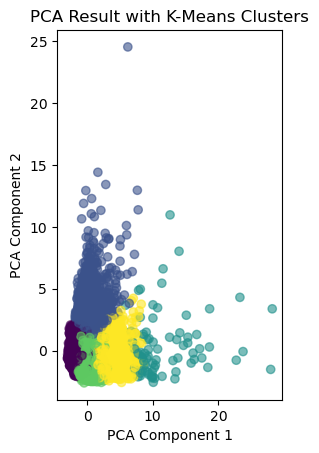

In [69]:
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('PCA Result with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Text(0, 0.5, 't-SNE Component 2')

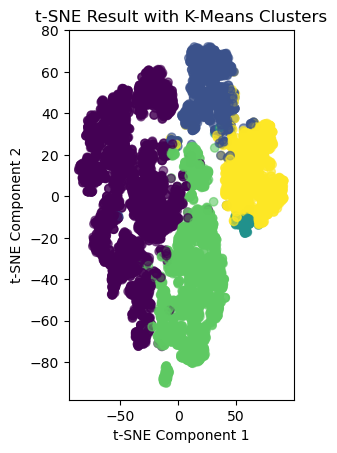

In [70]:
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Result with K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

In [71]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

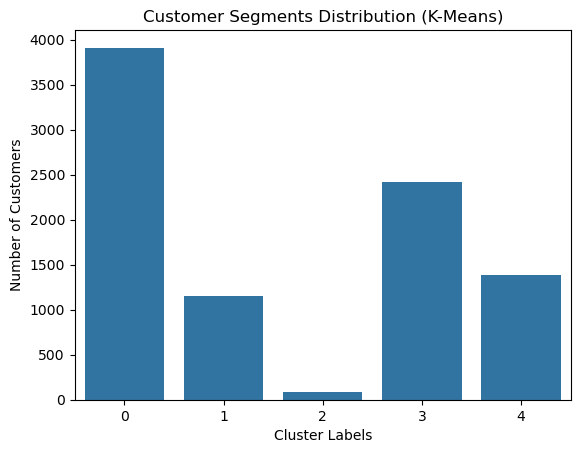

In [72]:
# Customer Segments Distribution
sns.countplot(x=kmeans_labels)
plt.title('Customer Segments Distribution (K-Means)')
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Customers')
plt.show()

In [73]:
# Save results
data['Cluster'] = kmeans_labels
data.to_csv('Customer_Segmentation_Results.csv', index=False)

# Optional: Create an interactive dashboard for further exploration